In [182]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt

In [183]:
date_parser = lambda c: pd.to_datetime(c, format='%d/%m/%Y', errors='coerce')
date_columns = ['applicApplicDate','applicFinishedDate','fuEvent_Date']
fu_df = pd.read_csv("data/applicationAndEventsExtract.csv", sep=';', encoding='unicode_escape', parse_dates=date_columns, date_parser=date_parser)

In [184]:
fu_df.head()

,applicSequence,applicInRegister,applicAdditive_name,applicAuthoris_Holder,applicApplicDate,applicFinishedDate,fu_number,fuEvent_Date,fuEvent_Type,csCFSNUM
0,682,True,PHOSPHORIC ACID 60% ON SILICA CARRIER (Procaaf),NaN,2010-11-04,2020-11-18,2610,2010-11-04,COM PDF submitted,1a
1,682,True,PHOSPHORIC ACID 60% ON SILICA CARRIER (Procaaf),NaN,2010-11-04,2020-11-18,2931,2010-11-10,TO DO LIST DONE,1a
2,682,True,PHOSPHORIC ACID 60% ON SILICA CARRIER (Procaaf),NaN,2010-11-04,2020-11-18,3816,2010-12-15,COM Application forwarded,1a
3,682,True,PHOSPHORIC ACID 60% ON SILICA CARRIER (Procaaf),NaN,2010-11-04,2020-11-18,3817,2010-12-15,COM Archived,1a
4,682,True,PHOSPHORIC ACID 60% ON SILICA CARRIER (Procaaf),NaN,2010-11-04,2020-11-18,3187,2010-11-15,COM Appl. FWD prepared,1a


In [185]:
type(fu_df.iloc[0].applicApplicDate)

pandas._libs.tslibs.timestamps.Timestamp

In [186]:
fu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24150 entries, 0 to 24149
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   applicSequence         24150 non-null  int64         
 1   applicInRegister       24150 non-null  bool          
 2   applicAdditive_name    24150 non-null  object        
 3   applicAuthoris_Holder  3749 non-null   object        
 4   applicApplicDate       24139 non-null  datetime64[ns]
 5   applicFinishedDate     14337 non-null  datetime64[ns]
 6   fu_number              24150 non-null  int64         
 7   fuEvent_Date           24150 non-null  datetime64[ns]
 8   fuEvent_Type           24150 non-null  object        
 9   csCFSNUM               24150 non-null  object        
dtypes: bool(1), datetime64[ns](3), int64(2), object(4)
memory usage: 1.7+ MB


In [187]:
fu_df.columns

Index(['applicSequence', 'applicInRegister', 'applicAdditive_name',
       'applicAuthoris_Holder', 'applicApplicDate', 'applicFinishedDate',
       'fu_number', 'fuEvent_Date', 'fuEvent_Type', 'csCFSNUM'],
      dtype='object')

In [188]:
fu_df.describe()

,applicSequence,fu_number
count,24150.000000,24150.000000
mean,1092.585756,30333.296439
std,777.281375,26041.312901
min,22.000000,65.000000
25%,592.000000,11590.250000
50%,915.000000,17194.500000
75%,1152.750000,63293.750000
max,3243.000000,73062.000000


Remove duplicate event records

In [189]:
duplicateSet = ['applicSequence', 'fuEvent_Date', 'fuEvent_Type']
duplicates_df = fu_df[fu_df.duplicated(subset=duplicateSet)]
fu_df.drop_duplicates(subset=duplicateSet, inplace=True)
fu_df.describe()

,applicSequence,fu_number
count,18864.000000,18864.000000
mean,1156.511821,28829.874841
std,805.019135,25732.278372
min,22.000000,65.000000
25%,617.000000,11369.750000
50%,967.000000,16704.500000
75%,1188.000000,65048.250000
max,3243.000000,73062.000000


In [190]:
duplicates_df.shape[0]

5286

Upcase fuEvent_Type to EVENT

In [152]:
fu_df['EVENT'] = fu_df['fuEvent_Type'].str.upper()

Remove events: TO DO LIST DONE

In [160]:
fu_df = fu_df[fu_df.EVENT != 'TO DO LIST DONE']
fu_df.shape[0]

16592

In [161]:
event_cnts = fu_df['applicSequence'].value_counts()

In [162]:
event_cnts.head()

326    62
487    58
190    57
307    56
659    55
Name: applicSequence, dtype: int64

In [163]:
event_cnts.rename('No of events')

326     62
487     58
190     57
307     56
659     55
        ..
3228     1
3236     1
3225     1
3237     1
3233     1
Name: No of events, Length: 931, dtype: int64

In [164]:
event_cnts.describe()

count    931.000000
mean      17.821697
std       10.169235
min        1.000000
25%       10.000000
50%       17.000000
75%       24.000000
max       62.000000
Name: applicSequence, dtype: float64

<IPython.core.display.Javascript object>


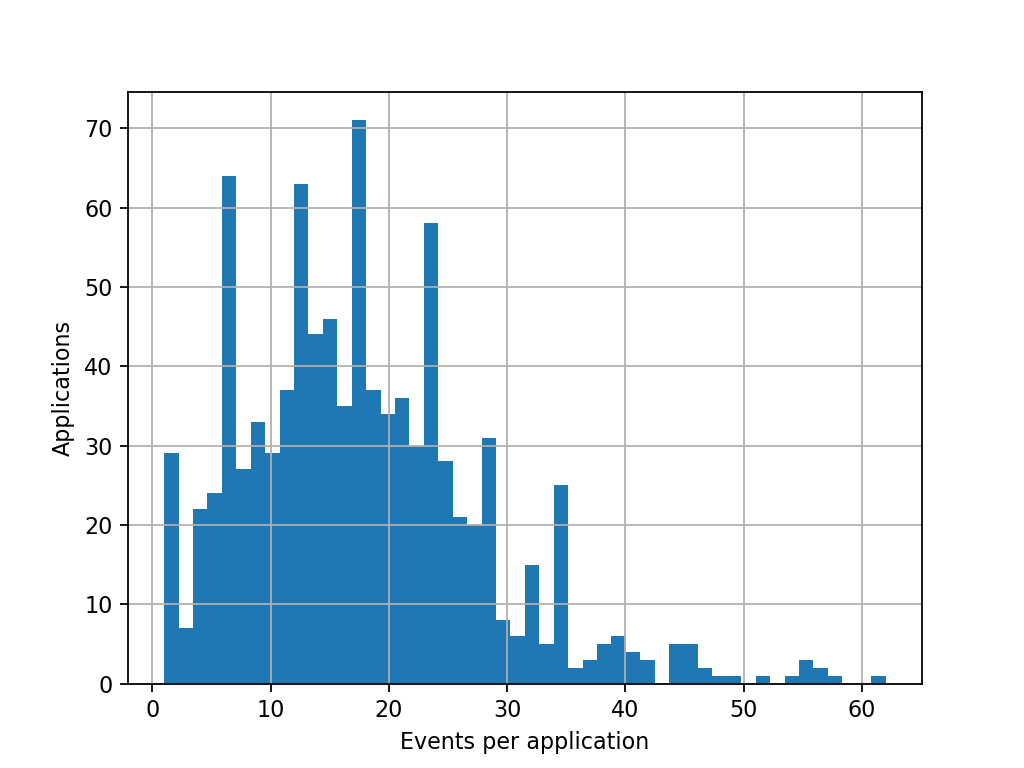

<AxesSubplot:xlabel='Events per application', ylabel='Applications'>

In [165]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100,110])
ax.set_xlabel('Events per application')
ax.set_ylabel('Applications')
event_cnts.hist(bins=50)

In [166]:
sum(event_cnts >40)

30

In [168]:
fu_df[fu_df['applicSequence'] == 307].sort_values('fuEvent_Date')

,applicSequence,applicInRegister,applicAdditive_name,applicAuthoris_Holder,applicApplicDate,applicFinishedDate,fu_number,fuEvent_Date,fuEvent_Type,csCFSNUM,EVENT
12793,307,True,L-Tryptophan produced by Escherichia coli stra...,not applicable,2010-07-05,2017-05-22,1291,2010-07-07,EFSA Received from applicant,3c,EFSA RECEIVED FROM APPLICANT
12792,307,True,L-Tryptophan produced by Escherichia coli stra...,not applicable,2010-07-05,2017-05-22,1280,2010-07-08,COM PDF submitted,3c,COM PDF SUBMITTED
12794,307,True,L-Tryptophan produced by Escherichia coli stra...,not applicable,2010-07-05,2017-05-22,1325,2010-07-15,COM Appl. FWD prepared,3c,COM APPL. FWD PREPARED
12791,307,True,L-Tryptophan produced by Escherichia coli stra...,not applicable,2010-07-05,2017-05-22,1424,2010-07-27,COM Appl. GROUP prepared,3c,COM APPL. GROUP PREPARED
12790,307,True,L-Tryptophan produced by Escherichia coli stra...,not applicable,2010-07-05,2017-05-22,1513,2010-08-13,COM Archived,3c,COM ARCHIVED
12789,307,True,L-Tryptophan produced by Escherichia coli stra...,not applicable,2010-07-05,2017-05-22,1568,2010-09-07,EFSA Stop,3c,EFSA STOP
12795,307,True,L-Tryptophan produced by Escherichia coli stra...,not applicable,2010-07-05,2017-05-22,3999,2011-01-03,EFSA Start,3c,EFSA START
12798,307,True,L-Tryptophan produced by Escherichia coli stra...,not applicable,2010-07-05,2017-05-22,4871,2011-05-26,EFSA Stop,3c,EFSA STOP
12796,307,True,L-Tryptophan produced by Escherichia coli stra...,not applicable,2010-07-05,2017-05-22,5092,2011-07-18,COM Appl. GROUP prepared,3c,COM APPL. GROUP PREPARED
12797,307,True,L-Tryptophan produced by Escherichia coli stra...,not applicable,2010-07-05,2017-05-22,5361,2011-07-29,COM GROUP forwarded,3c,COM GROUP FORWARDED


In [173]:
event_types_df = fu_df['EVENT'].value_counts()
event_types_df.head(10)

FROM APPLICANT                  1484
EFSA STOP                       1143
EFSA RE-START                   1062
COM APPLICATION FORWARDED        779
COM PDF SUBMITTED                772
COM APPL. FWD PREPARED           648
EFSA VALIDITY CHECK              638
COM ACTION                       560
EFSA QUESTION                    501
EFSA RECEIVED FROM APPLICANT     489
Name: EVENT, dtype: int64

In [174]:
event_types_df[event_types_df == 1]

CONF 6A CIS NOTE                        1
CONF 8A NOTIF APPLICANT SENT            1
RECORD CREATED DATE                     1
CONF 3B CIF APPLICANT SENT              1
COM ARTICLE CHANGED                     1
COM PARTIAL WITHDRAWAL REG PUBLISHED    1
CONF 9B REFUSED                         1
Name: EVENT, dtype: int64

In [175]:
event_types_df[event_types_df == 2]

CONF 5B LETTER TO APPLICANT SENT    2
EFSA PRE NOTIFICATION OF OPINION    2
COM WITHDRAWAL REG PUBLISHED        2
EURL FEED PAID                      2
AGP COMMITTEE DATE                  2
CONF 6C CIS END                     2
CONF 8B NOTIF EFSA PREPARED         2
Name: EVENT, dtype: int64

In [176]:
event_types_df[event_types_df <= 5]

AGP ISC TABLE VALID                     5
EFSA GROUP RE-START                     5
CONF 3C CIF APPLICANT BACK              4
COM EFSC SUBMITTED                      4
CONF 7A LANGUAGE WAIVER PREPARED        3
COM APPL. NEW MANDATE SENT              3
EFSA REMOVED FROM SC. NET               3
COM SPS NOTIFIED                        3
COM APPL. NEW MANDATE PREPARED          3
CRL FEED PAID                           3
CONF 5B LETTER TO APPLICANT SENT        2
EFSA PRE NOTIFICATION OF OPINION        2
COM WITHDRAWAL REG PUBLISHED            2
EURL FEED PAID                          2
AGP COMMITTEE DATE                      2
CONF 6C CIS END                         2
CONF 8B NOTIF EFSA PREPARED             2
CONF 6A CIS NOTE                        1
CONF 8A NOTIF APPLICANT SENT            1
RECORD CREATED DATE                     1
CONF 3B CIF APPLICANT SENT              1
COM ARTICLE CHANGED                     1
COM PARTIAL WITHDRAWAL REG PUBLISHED    1
CONF 9B REFUSED                   

In [177]:
events_df = fu_df['EVENT'].value_counts()

In [178]:
events_df.describe()

count     110.000000
mean      150.836364
std       254.240352
min         1.000000
25%        12.000000
50%        38.500000
75%       160.750000
max      1484.000000
Name: EVENT, dtype: float64

In [179]:
events_df.head(20)

FROM APPLICANT                  1484
EFSA STOP                       1143
EFSA RE-START                   1062
COM APPLICATION FORWARDED        779
COM PDF SUBMITTED                772
COM APPL. FWD PREPARED           648
EFSA VALIDITY CHECK              638
COM ACTION                       560
EFSA QUESTION                    501
EFSA RECEIVED FROM APPLICANT     489
EFSA OPINION                     454
COM REG PUBLISHED                404
EFSA START                       390
CONF REQUESTED BY APPLICANT      382
EFSA AOR                         368
EFSA OPINION FROM EFSA           359
EFSA RQST SUPPLEM INFOS          357
EFSA ACTION                      341
CONF NOT READY EFSA              340
EFSA OPINION ADOPTED             331
Name: EVENT, dtype: int64

In [180]:
events_df[events_df <= 5]

AGP ISC TABLE VALID                     5
EFSA GROUP RE-START                     5
CONF 3C CIF APPLICANT BACK              4
COM EFSC SUBMITTED                      4
CONF 7A LANGUAGE WAIVER PREPARED        3
COM APPL. NEW MANDATE SENT              3
EFSA REMOVED FROM SC. NET               3
COM SPS NOTIFIED                        3
COM APPL. NEW MANDATE PREPARED          3
CRL FEED PAID                           3
CONF 5B LETTER TO APPLICANT SENT        2
EFSA PRE NOTIFICATION OF OPINION        2
COM WITHDRAWAL REG PUBLISHED            2
EURL FEED PAID                          2
AGP COMMITTEE DATE                      2
CONF 6C CIS END                         2
CONF 8B NOTIF EFSA PREPARED             2
CONF 6A CIS NOTE                        1
CONF 8A NOTIF APPLICANT SENT            1
RECORD CREATED DATE                     1
CONF 3B CIF APPLICANT SENT              1
COM ARTICLE CHANGED                     1
COM PARTIAL WITHDRAWAL REG PUBLISHED    1
CONF 9B REFUSED                   